# Curve fitting

## Finding gamma and lamda

In [4]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
import math
from scipy.integrate import odeint

In [5]:
#% matplotlib inline

# DATA ------------------------------------------------------------------------
x_samp = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y_samp = np.array([3,8,26,76,225,298,258,233,189,128,68,29,14,4]) 

In [2]:
def func(x, betta, nu):
    pop=762
    def du_dt(u,t):
        lamda=betta*u[1]/pop
        return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
    x=np.linspace(1,14,14)
    y0=[pop-1,1,0]
    y=odeint(du_dt,y0,x)
    return y[:,1]

Estimated Parameters [1.96814953 0.47124392]


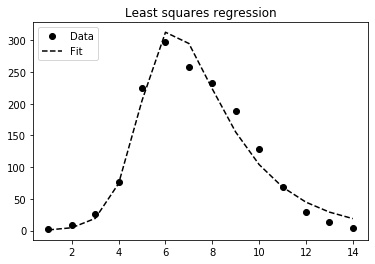

In [6]:
x_lin=np.linspace(1,14,14)
p0 = [1.15,0.02]                                        # guessed params
w,_ = opt.curve_fit(func, x_samp, y_samp, p0=p0)     
print("Estimated Parameters", w)  
y_model = func(x_lin, *w)
plt.plot(x_samp, y_samp, "ko", label="Data")
plt.plot(x_lin, y_model, "k--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left")
plt.show()

In [7]:
def sqr_err(x,y):
    error=0
    for i in range(len(x)):
        error+=(x[i]-y[i])**2
    return(error)

In [8]:
sqr_err(y_samp,y_model)

4551.153266075826

In [9]:
def f(x):
    y=[]
    for i in x:
        y.append(scipy.special.factorial(i))
    return(np.array(y))
def liklihood(y1,y2):
    return(np.sum(np.dot(y1,np.log(y1))-y1-np.dot(np.log(y2),y2)-y2))

In [10]:
liklihood(y_model,y_samp)

-3806.4044281012802